<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 4
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

        X0      X1     X2     X3     X4      X5     X6      X7     X8     X9  \
0    4.950   9.901  3.960  0.990  0.000   7.921  5.941  11.881  3.960  5.941   
1    3.750   7.083  2.917  7.083  3.750  12.500  4.583   4.167  2.500  2.917   
2    4.583   7.917  3.750  3.333  3.750   5.833  3.750   5.000  2.917  7.500   
3    5.696   6.329  5.063  6.962  2.532   5.696  1.266   2.532  4.430  4.430   
4    5.069  10.138  4.608  5.069  0.922   3.687  5.991   2.765  3.226  4.608   
..     ...     ...    ...    ...    ...     ...    ...     ...    ...    ...   
995  3.306   3.306  4.132  7.438  3.306   8.264  4.959   3.306  4.132  2.479   
996  4.717   5.660  4.717  7.547  5.660   7.547  5.660   3.774  2.830  8.491   
997  3.020   8.054  4.698  7.383  2.013   9.732  6.711   3.691  1.342  7.383   
998  6.800   6.448  3.869  4.572  3.048   4.689  4.103   5.744  2.931  4.924 

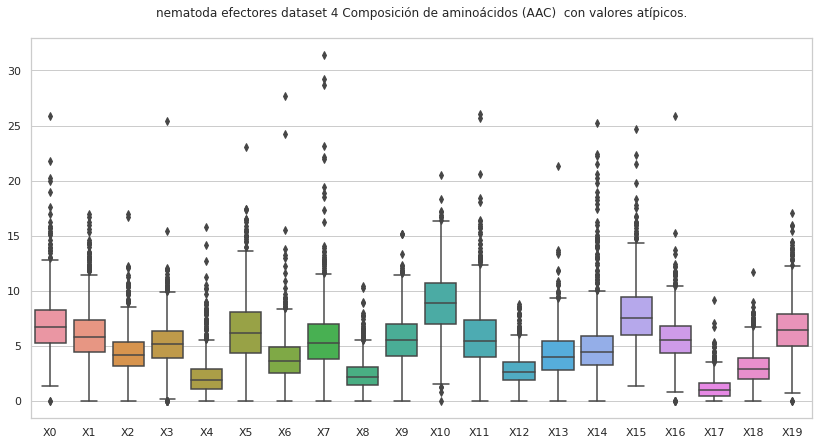

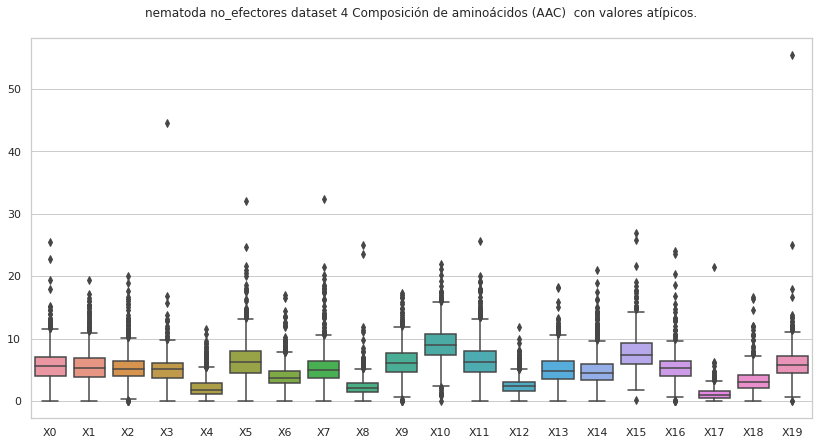

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

        X0     X1     X2      X3     X4      X5     X6      X7     X8     X9  \
0    4.950  9.901  3.960   0.990  0.000   7.921  5.941  11.881  3.960  5.941   
1    3.750  7.083  2.917   7.083  3.750  12.500  4.583   4.167  2.500  2.917   
2    4.583  7.917  3.750   3.333  3.750   5.833  3.750   5.000  2.917  7.500   
3    5.696  6.329  5.063   6.962  2.532   5.696  1.266   2.532  4.430  4.430   
5    7.652  5.013  3.430   6.332  1.583   5.805  2.902   8.971  2.375  5.013   
..     ...    ...    ...     ...    ...     ...    ...     ...    ...    ...   
994  5.946  7.568  3.784  10.270  0.541  12.432  2.162   4.324  0.541  2.162   
995  3.306  3.306  4.132   7.438  3.306   8.264  4.959   3.306  4.132  2.479   
997  3.020  8.054  4.698   7.383  2.013   9.732  6.711   3.691  1.342  7.383   
998  6.800  6.448  3.869   4.572  3.048   4.689  4.103   5.744  2.931  4.924 

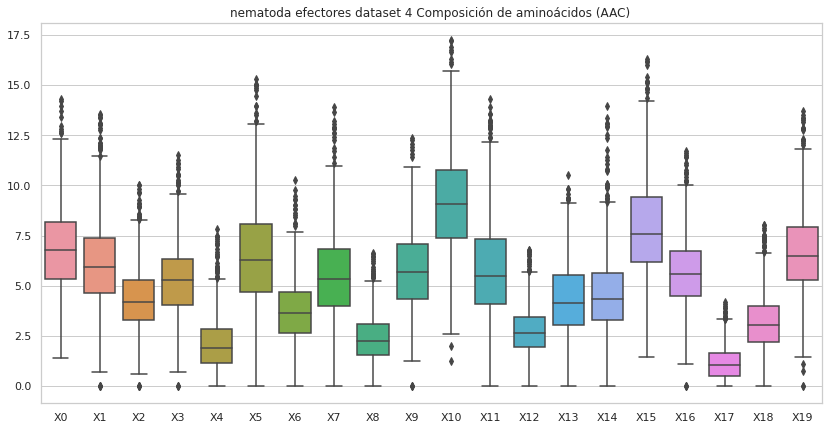

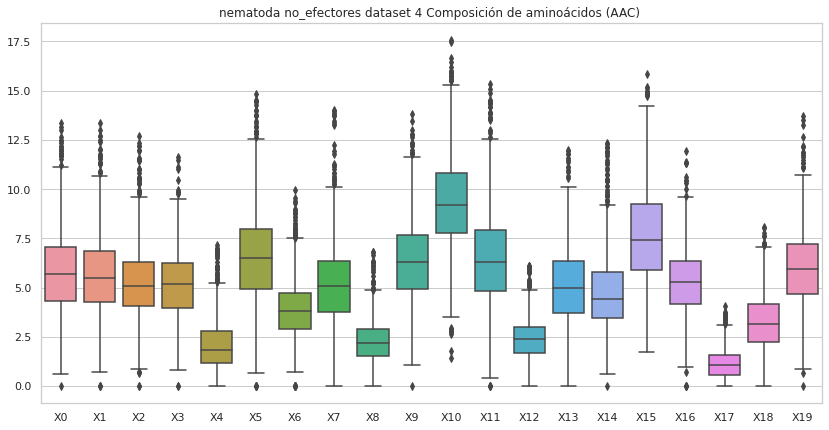

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.018852  0.000000  0.003770  0.030164  0.018852  0.045245  0.015082   
1    0.012446  0.012446  0.023508  0.041485  0.011063  0.013828  0.008297   
2    0.048190  0.039428  0.035047  0.061333  0.052571  0.052571  0.030666   
3    0.095548  0.042466  0.116781  0.095548  0.095548  0.042466  0.074315   
4    0.019380  0.003524  0.019380  0.014094  0.008809  0.010571  0.012332   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.013638  0.013638  0.030686  0.034096  0.013638  0.013638  0.017048   
996  0.090534  0.108641  0.144855  0.144855  0.090534  0.072427  0.054321   
997  0.009199  0.006133  0.022487  0.029641  0.008177  0.011243  0.004088   
998  0.048135  0.021578  0.032366  0.033196  0.029877  0.040665  0.020748   
999  0.0

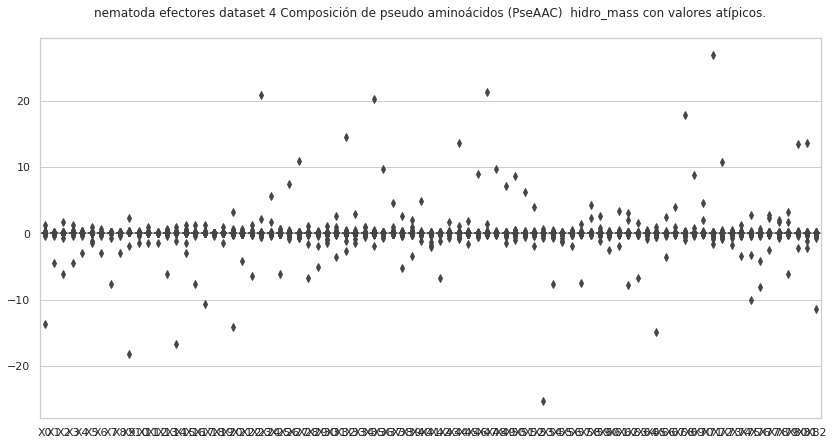

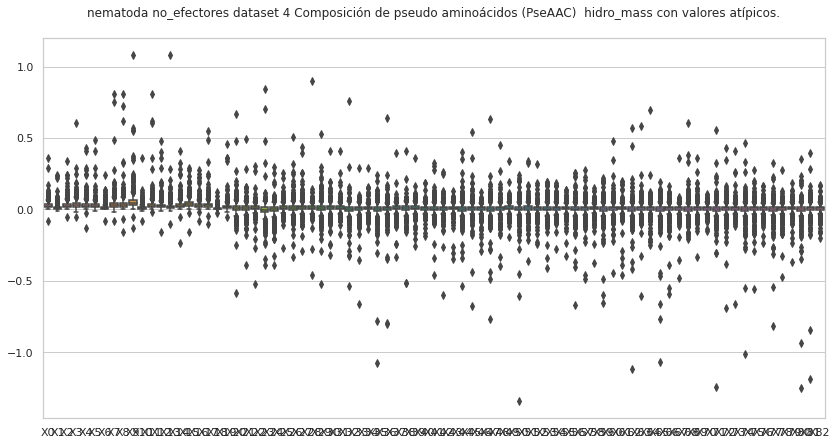

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.018852  0.000000  0.003770  0.030164  0.018852  0.045245  0.015082   
1    0.012446  0.012446  0.023508  0.041485  0.011063  0.013828  0.008297   
2    0.048190  0.039428  0.035047  0.061333  0.052571  0.052571  0.030666   
3    0.095548  0.042466  0.116781  0.095548  0.095548  0.042466  0.074315   
4    0.019380  0.003524  0.019380  0.014094  0.008809  0.010571  0.012332   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.013638  0.013638  0.030686  0.034096  0.013638  0.013638  0.017048   
996  0.090534  0.108641  0.144855  0.144855  0.090534  0.072427  0.054321   
997  0.009199  0.006133  0.022487  0.029641  0.008177  0.011243  0.004088   
998  0.048135  0.021578  0.032366  0.033196  0.029877  0.040665  0.020748   
999  0.0

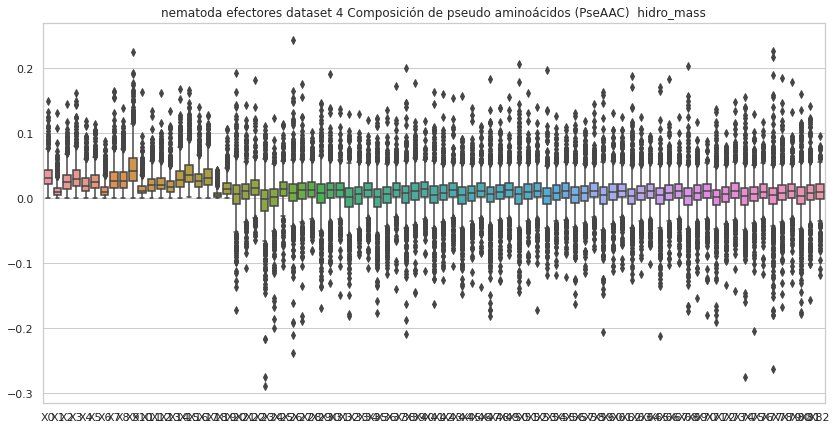

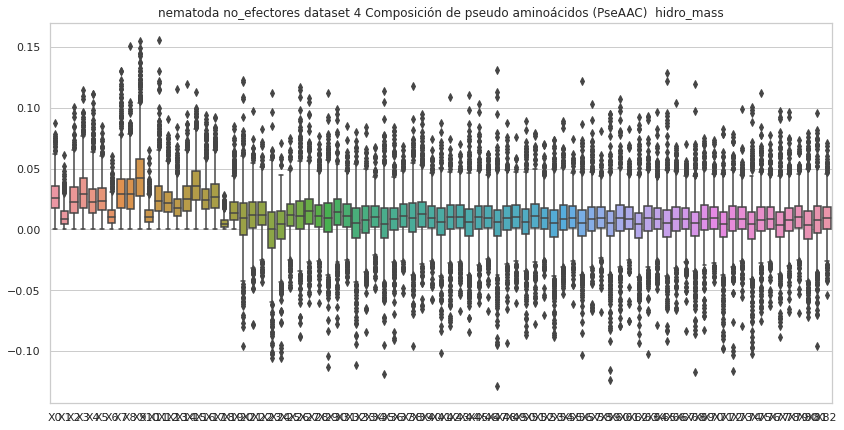

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.031156  0.000000  0.006231  0.049849  0.031156  0.074774  0.024925   
1    0.050142  0.050142  0.094713  0.167141  0.044571  0.055714  0.033428   
2    0.041527  0.033976  0.030201  0.052852  0.045302  0.045302  0.026426   
3    0.062386  0.027727  0.076249  0.062386  0.062386  0.027727  0.048522   
4    0.031586  0.005743  0.031586  0.022972  0.014357  0.017229  0.020100   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.019764  0.019764  0.044469  0.049410  0.019764  0.019764  0.024705   
996  0.046791  0.056149  0.074865  0.074865  0.046791  0.037432  0.028074   
997  0.027262  0.018175  0.066641  0.087845  0.024233  0.033320  0.012117   
998  0.042355  0.018987  0.028480  0.029211  0.026290  0.035783  0.018257   
999  0.034776 

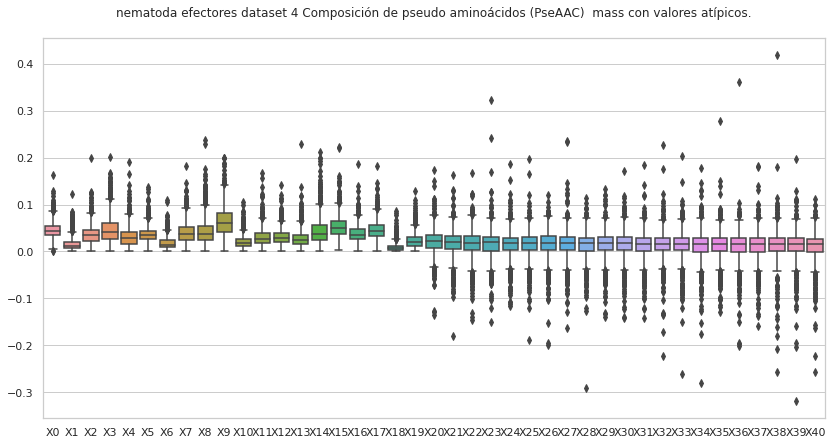

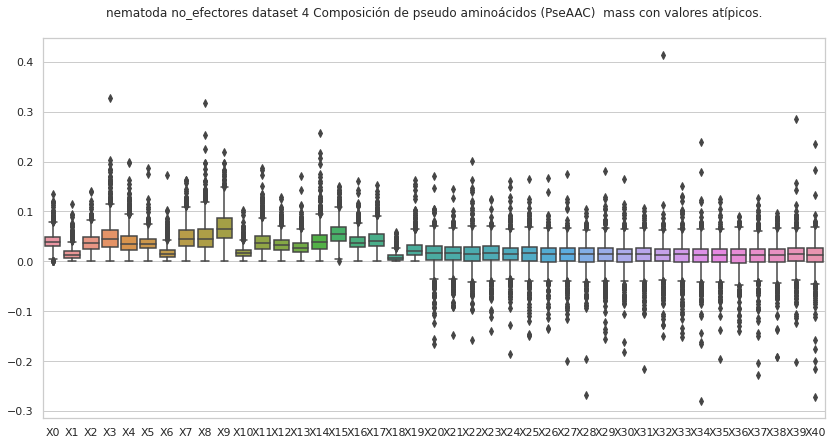

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.031156  0.000000  0.006231  0.049849  0.031156  0.074774  0.024925   
2    0.041527  0.033976  0.030201  0.052852  0.045302  0.045302  0.026426   
3    0.062386  0.027727  0.076249  0.062386  0.062386  0.027727  0.048522   
4    0.031586  0.005743  0.031586  0.022972  0.014357  0.017229  0.020100   
5    0.030884  0.006390  0.025560  0.023430  0.022365  0.036209  0.009585   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.028783  0.002617  0.049716  0.060182  0.015700  0.020933  0.002617   
995  0.019764  0.019764  0.044469  0.049410  0.019764  0.019764  0.024705   
997  0.027262  0.018175  0.066641  0.087845  0.024233  0.033320  0.012117   
998  0.042355  0.018987  0.028480  0.029211  0.026290  0.035783  0.018257   
999  0.034776  0.021528 

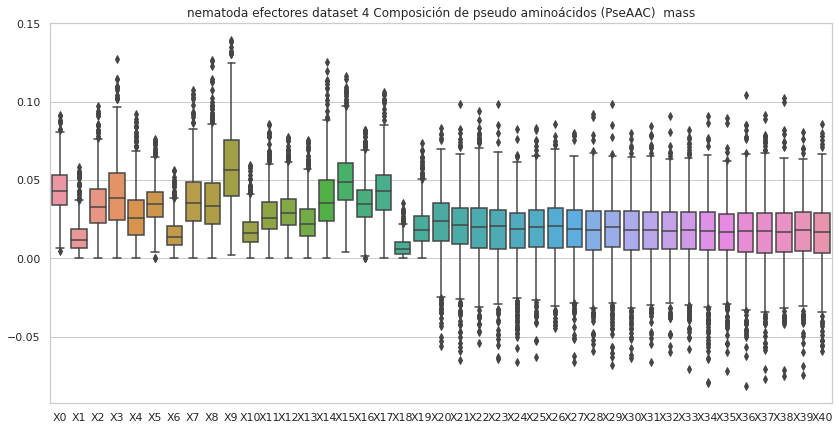

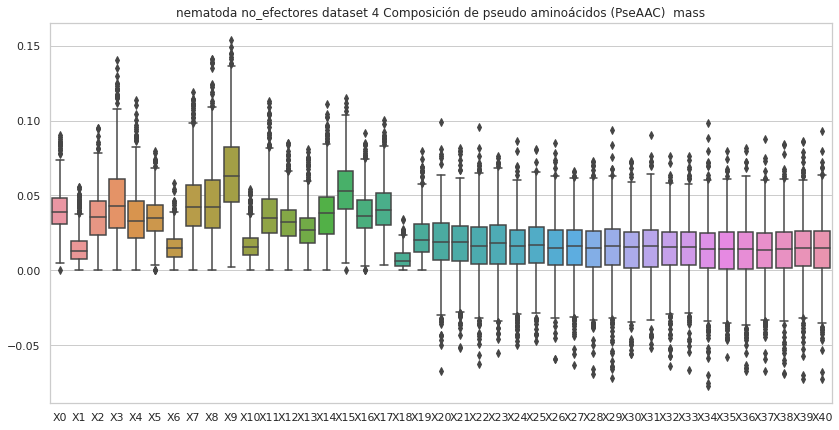

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.024303  0.000000  0.004861  0.038885  0.024303  0.058327  0.019442   
1    0.011485  0.011485  0.021693  0.038282  0.010208  0.012761  0.007656   
2    0.054088  0.044254  0.039336  0.068839  0.059005  0.059005  0.034419   
3    0.083388  0.037061  0.101919  0.083388  0.083388  0.037061  0.064857   
4    0.025209  0.004583  0.025209  0.018334  0.011459  0.013750  0.016042   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.018877  0.018877  0.042473  0.047192  0.018877  0.018877  0.023596   
996  0.091965  0.110358  0.147144  0.147144  0.091965  0.073572  0.055179   
997  0.009511  0.006341  0.023250  0.030648  0.008455  0.011625  0.004227   
998  0.084230  0.037758  0.056638  0.058090  0.052281  0.071160  0.036306   
999  0.028399

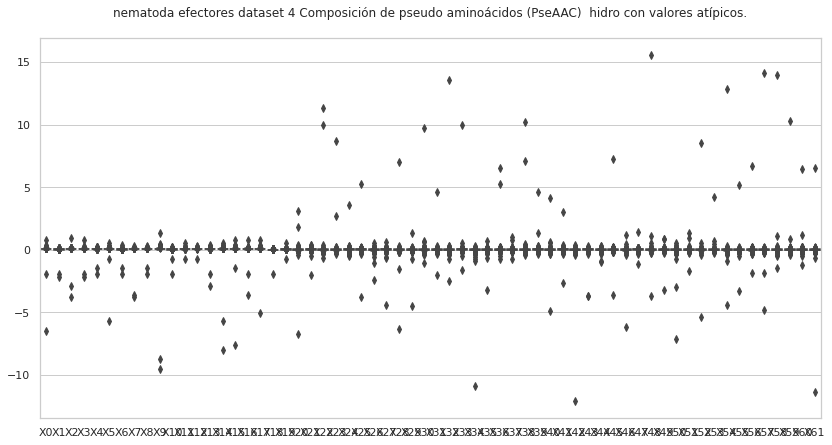

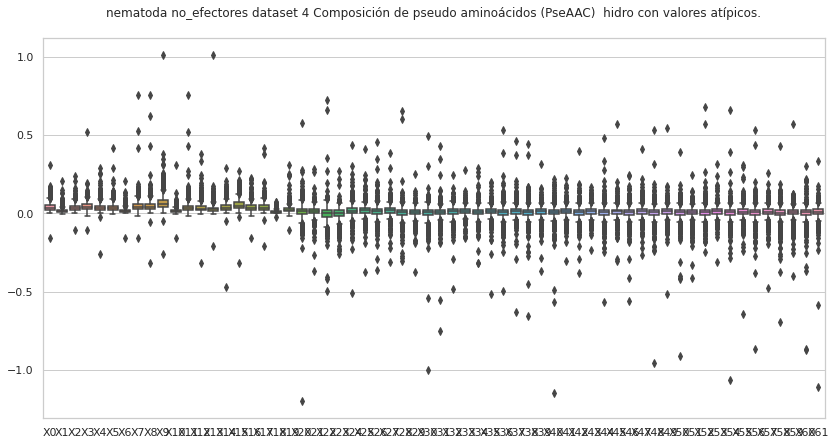

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.024303  0.000000  0.004861  0.038885  0.024303  0.058327  0.019442   
1    0.011485  0.011485  0.021693  0.038282  0.010208  0.012761  0.007656   
2    0.054088  0.044254  0.039336  0.068839  0.059005  0.059005  0.034419   
3    0.083388  0.037061  0.101919  0.083388  0.083388  0.037061  0.064857   
4    0.025209  0.004583  0.025209  0.018334  0.011459  0.013750  0.016042   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.018877  0.018877  0.042473  0.047192  0.018877  0.018877  0.023596   
996  0.091965  0.110358  0.147144  0.147144  0.091965  0.073572  0.055179   
997  0.009511  0.006341  0.023250  0.030648  0.008455  0.011625  0.004227   
998  0.084230  0.037758  0.056638  0.058090  0.052281  0.071160  0.036306   
999  0.028399  0.01

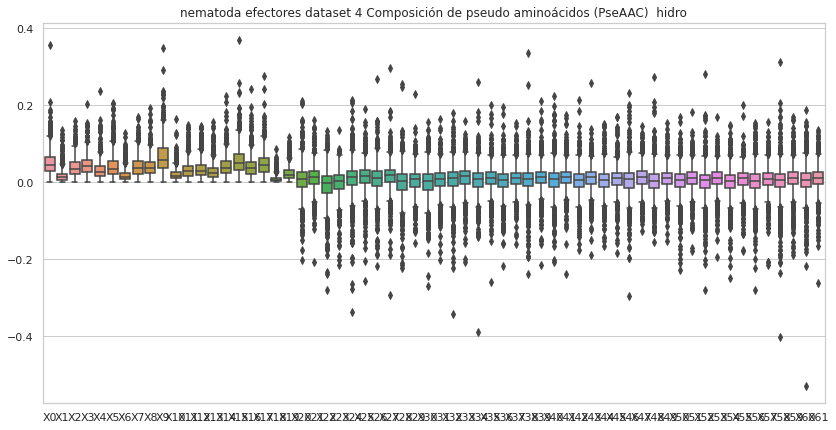

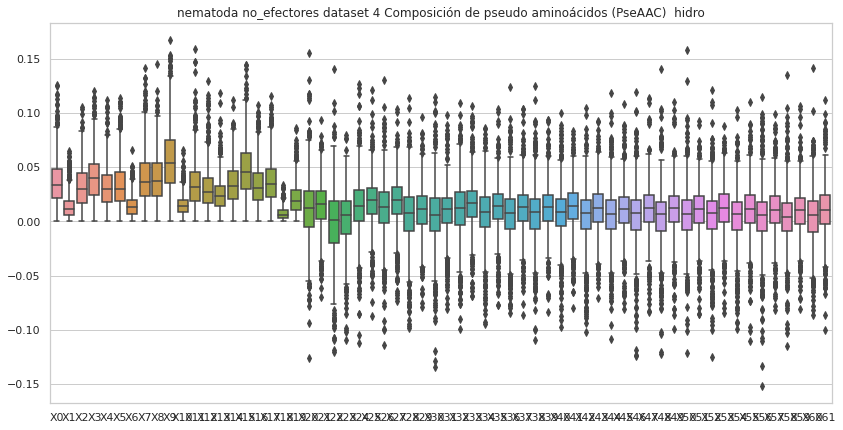

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.218244  0.165539  0.056992  0.004227  0.105088 -0.095810  0.028425   
1   -0.004767  0.000896  0.027689 -0.034625 -0.071647  0.048405  0.116707   
2    0.048562  0.017845  0.013823 -0.053341 -0.035738 -0.070553  0.024781   
3   -0.027969  0.022099 -0.068296 -0.010149 -0.030623 -0.070653  0.019133   
4    0.013399  0.025362  0.053115  0.044309  0.042439  0.042985  0.008109   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.004752  0.037677 -0.081200 -0.065022  0.032421 -0.024451  0.098704   
996  0.120346 -0.015528 -0.066367 -0.113780 -0.087586 -0.150389  0.024614   
997 -0.077321 -0.006474  0.027995  0.008948  0.022489 -0.028513 -0.026591   
998  0.014293 -0.022930 -0.001020  0.037801  0.009239 -0.034653 -0.008831   
999  0.025367 

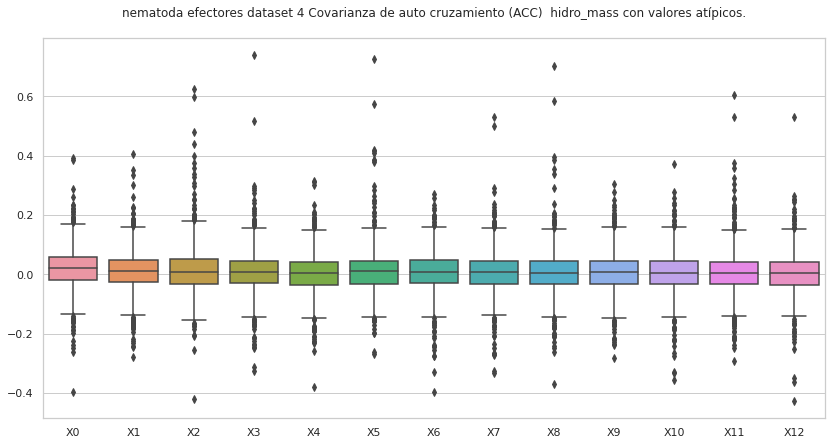

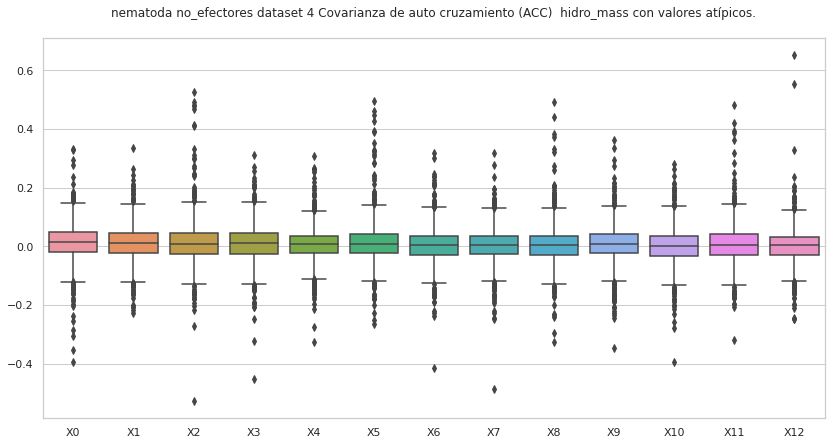

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.218244  0.165539  0.056992  0.004227  0.105088 -0.095810  0.028425   
1   -0.004767  0.000896  0.027689 -0.034625 -0.071647  0.048405  0.116707   
2    0.048562  0.017845  0.013823 -0.053341 -0.035738 -0.070553  0.024781   
3   -0.027969  0.022099 -0.068296 -0.010149 -0.030623 -0.070653  0.019133   
4    0.013399  0.025362  0.053115  0.044309  0.042439  0.042985  0.008109   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.004752  0.037677 -0.081200 -0.065022  0.032421 -0.024451  0.098704   
996  0.120346 -0.015528 -0.066367 -0.113780 -0.087586 -0.150389  0.024614   
997 -0.077321 -0.006474  0.027995  0.008948  0.022489 -0.028513 -0.026591   
998  0.014293 -0.022930 -0.001020  0.037801  0.009239 -0.034653 -0.008831   
999  0.025367 

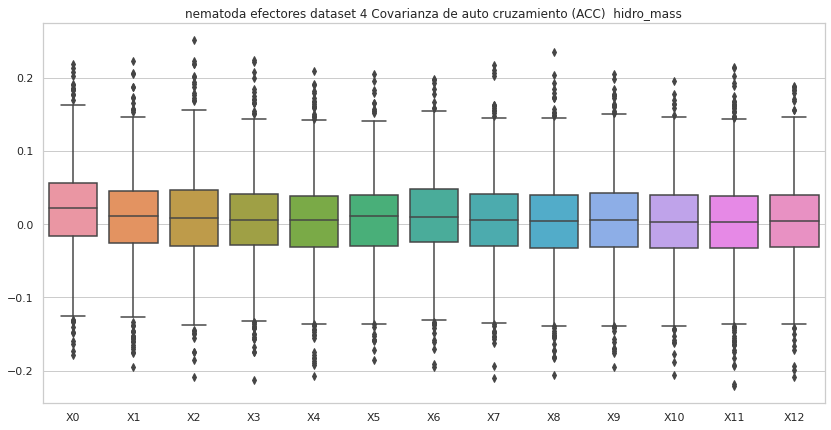

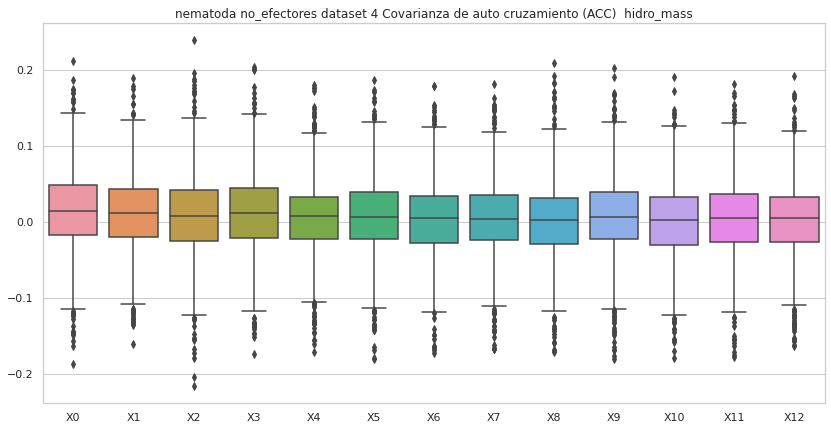

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.218244  0.165539  0.056992  0.004227  0.105088 -0.095810  0.028425   
1   -0.004767  0.000896  0.027689 -0.034625 -0.071647  0.048405  0.116707   
2    0.048562  0.017845  0.013823 -0.053341 -0.035738 -0.070553  0.024781   
3   -0.027969  0.022099 -0.068296 -0.010149 -0.030623 -0.070653  0.019133   
4    0.013399  0.025362  0.053115  0.044309  0.042439  0.042985  0.008109   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.004752  0.037677 -0.081200 -0.065022  0.032421 -0.024451  0.098704   
996  0.120346 -0.015528 -0.066367 -0.113780 -0.087586 -0.150389  0.024614   
997 -0.077321 -0.006474  0.027995  0.008948  0.022489 -0.028513 -0.026591   
998  0.014293 -0.022930 -0.001020  0.037801  0.009239 -0.034653 -0.008831   
999  0.025367  0.018

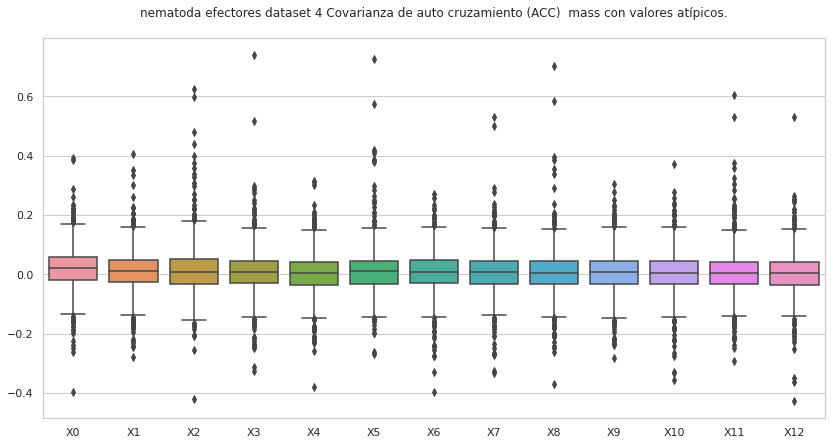

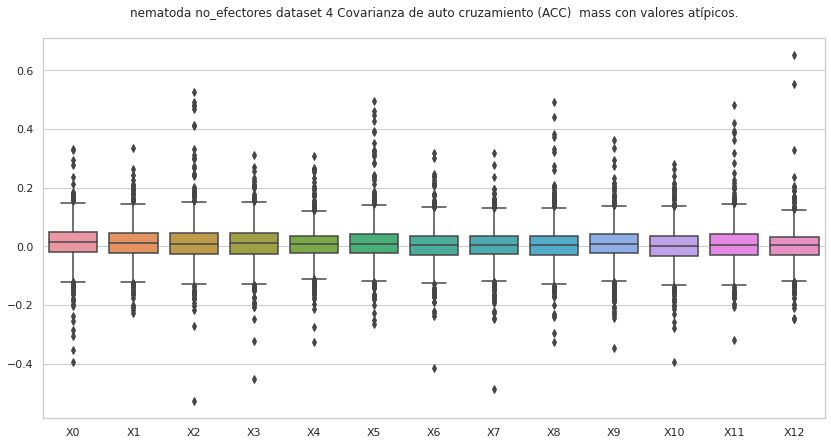

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.218244  0.165539  0.056992  0.004227  0.105088 -0.095810  0.028425   
1   -0.004767  0.000896  0.027689 -0.034625 -0.071647  0.048405  0.116707   
2    0.048562  0.017845  0.013823 -0.053341 -0.035738 -0.070553  0.024781   
3   -0.027969  0.022099 -0.068296 -0.010149 -0.030623 -0.070653  0.019133   
4    0.013399  0.025362  0.053115  0.044309  0.042439  0.042985  0.008109   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.004752  0.037677 -0.081200 -0.065022  0.032421 -0.024451  0.098704   
996  0.120346 -0.015528 -0.066367 -0.113780 -0.087586 -0.150389  0.024614   
997 -0.077321 -0.006474  0.027995  0.008948  0.022489 -0.028513 -0.026591   
998  0.014293 -0.022930 -0.001020  0.037801  0.009239 -0.034653 -0.008831   
999  0.025367  0.018190  0.067

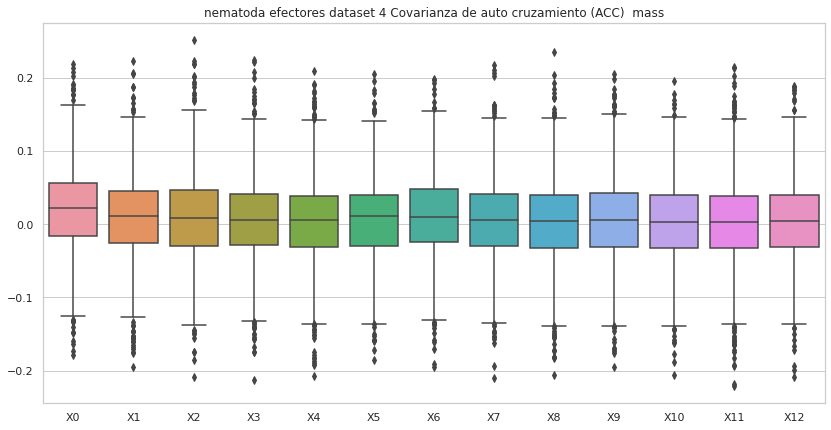

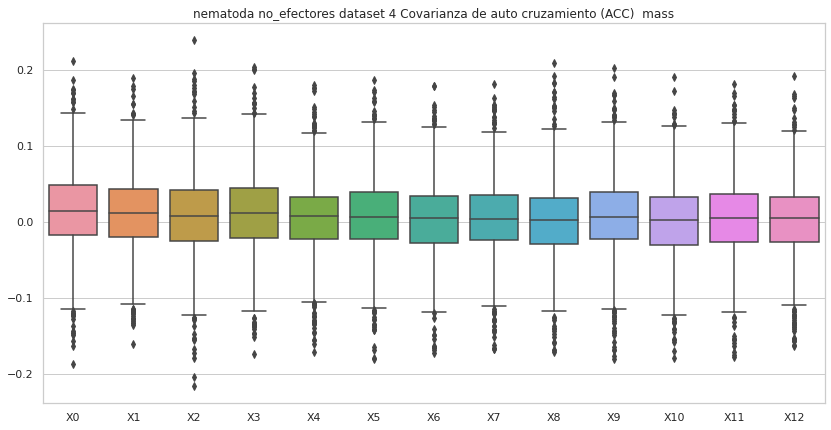

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.050496 -0.221279  0.004202  0.120614 -0.006600 -0.013983 -0.037731   
1   -0.046629 -0.093572 -0.032753  0.030833  0.049962  0.017556  0.128570   
2   -0.118273 -0.131529  0.056141 -0.016719 -0.055235 -0.073870 -0.017822   
3    0.057330 -0.231126 -0.072878 -0.043912  0.006700 -0.090982  0.001974   
4   -0.015430  0.030615 -0.011865 -0.102593  0.080050 -0.050338  0.035169   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.002941  0.027240 -0.154167 -0.064263 -0.046394 -0.152431 -0.092003   
996  0.027931 -0.128791 -0.101648  0.071394  0.043592 -0.112924  0.056260   
997 -0.082439  0.053807  0.034348 -0.049024 -0.099415  0.034551  0.102971   
998 -0.033174 -0.034189 -0.046915  0.007485 -0.044830 -0.060160 -0.033140   
999  0.022854  0.04

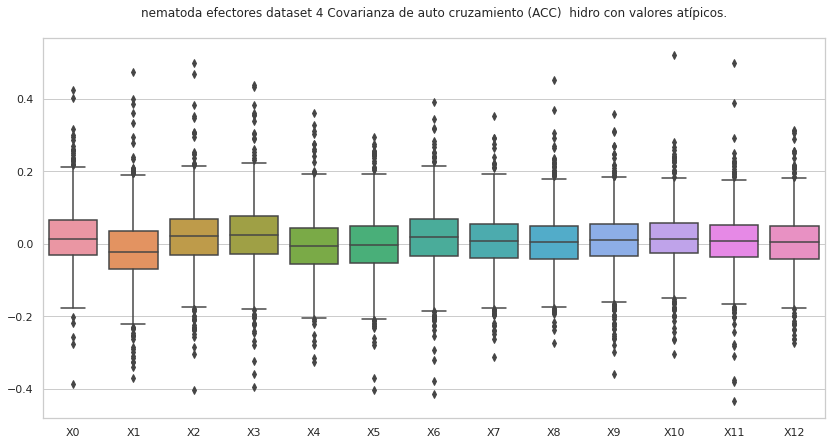

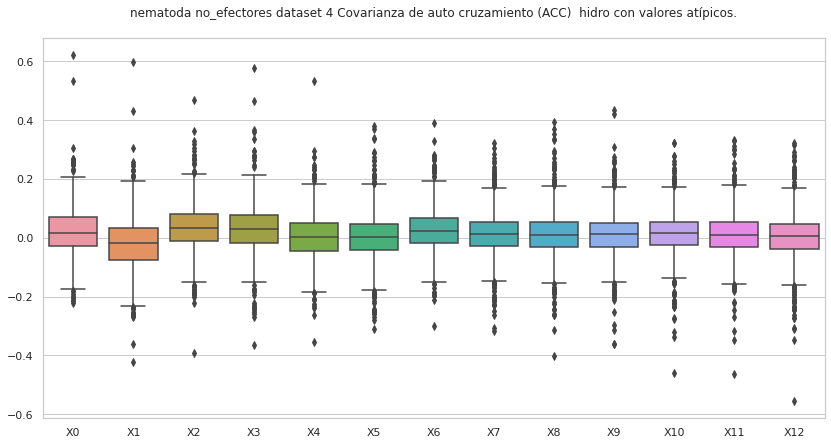

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.050496 -0.221279  0.004202  0.120614 -0.006600 -0.013983 -0.037731   
1   -0.046629 -0.093572 -0.032753  0.030833  0.049962  0.017556  0.128570   
2   -0.118273 -0.131529  0.056141 -0.016719 -0.055235 -0.073870 -0.017822   
3    0.057330 -0.231126 -0.072878 -0.043912  0.006700 -0.090982  0.001974   
4   -0.015430  0.030615 -0.011865 -0.102593  0.080050 -0.050338  0.035169   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.002941  0.027240 -0.154167 -0.064263 -0.046394 -0.152431 -0.092003   
996  0.027931 -0.128791 -0.101648  0.071394  0.043592 -0.112924  0.056260   
997 -0.082439  0.053807  0.034348 -0.049024 -0.099415  0.034551  0.102971   
998 -0.033174 -0.034189 -0.046915  0.007485 -0.044830 -0.060160 -0.033140   
999  0.022854  0.048701  

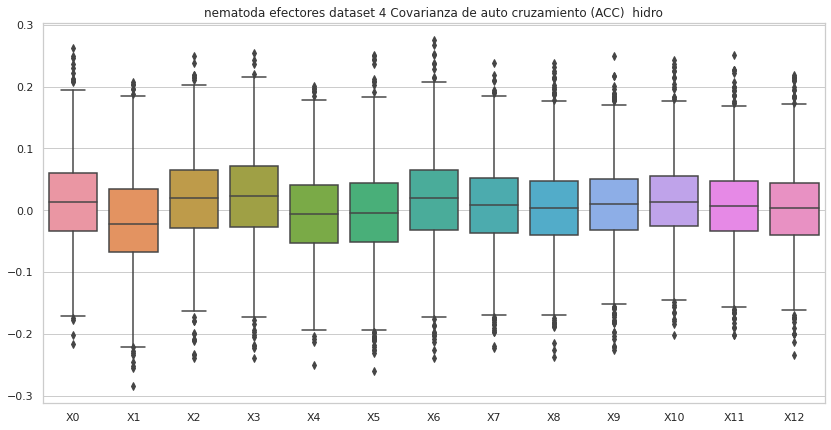

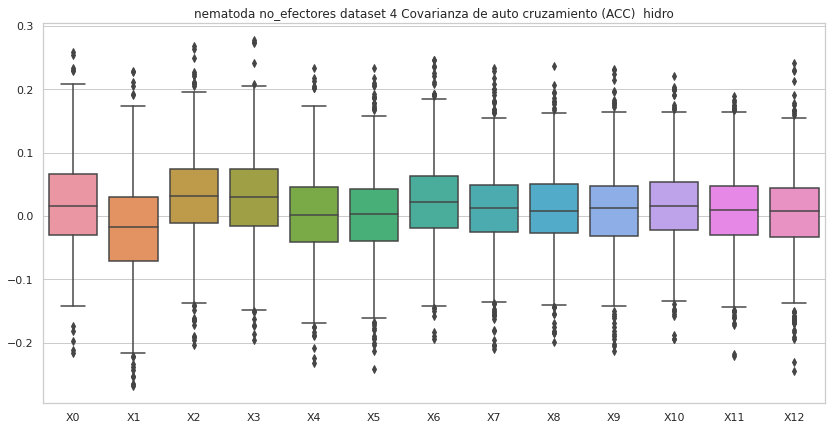

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))